In [2]:
import pyfolio as pf

from backtester import Backtest
from backtester.strategy import Strategy, StrategyLeg
from backtester.enums import Type, Direction, Stock
from backtester.datahandler import HistoricalOptionsData, TiingoData

/usr/local/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
options_data = HistoricalOptionsData('data/SPX_2017.csv')
options_data.quotedate = options_data.quotedate.dt.tz_localize(None)
schema = options_data.schema


In [4]:
stock_data = TiingoData('data/portfolio_data_2017.csv')
stock_data._data.date = stock_data._data.date.dt.tz_localize(None)

In [5]:
short_straddle = Strategy(schema)

leg1 = StrategyLeg("leg_1", schema, option_type=Type.CALL, direction=Direction.SELL)
leg1.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 31) & (schema.dte <= 60) & (schema.strike >= schema.underlying_last * 0.95) & (schema.strike <= schema.underlying_last * 1.05)

leg1.exit_filter = (schema.dte <= 2)

leg2 = StrategyLeg("leg_2", schema, option_type=Type.PUT, direction=Direction.SELL)
leg2.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 31) & (schema.dte <= 60) & (schema.strike >= schema.underlying_last * 0.95) & (schema.strike <= schema.underlying_last * 1.05)

leg2.exit_filter = (schema.dte <= 2)

short_straddle.add_legs([leg1, leg2]);

In [6]:
VOO = Stock('VOO', 0.1)
TUR = Stock('TUR', 0.05)
RSX = Stock('RSX', 0.05)
EWY = Stock('EWY', 0.05)
EWS = Stock('EWS', 0.05)
VTIP = Stock('VTIP', 0.10)
TLT = Stock('TLT', 0.20)
BWX = Stock('BWX', 0.10)
PDBC = Stock('PDBC', 0.05)
IAU = Stock('IAU', 0.15)
VNQI = Stock('VNQI', 0.10)

In [7]:
0.1 + 0.05 + 0.05 + 0.05 + 0.05 + 0.10 + 0.20 + 0.10 + 0.05 + 0.15 + 0.10

1.0000000000000002

In [8]:
stocks = [
    VOO,
    TUR,
    RSX,
    EWY,
    EWS,
    VTIP,
    TLT,
    BWX,
    PDBC,
    IAU,
    VNQI
]

In [9]:
bt = Backtest({'stocks': 0.99, 'options': 0.01, 'cash': 0})
bt.stocks = stocks
bt._options_strategy = short_straddle
bt.options_data = options_data
bt.stocks_data = stock_data


In [10]:
bt.run(rebalance_freq=1)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


leg_1                                                       \
              contract underlying expiration  type strike   cost      order   
0   SPX170217C02190000        SPX 2017-02-17  call   2190  -8110  Order.STO   
1   SPX170317C02170000        SPX 2017-03-17  call   2170 -11350  Order.STO   
2   SPX170217C02190000        SPX 2017-02-17  call   2190      0  Order.BTC   
3   SPX170421C02280000        SPX 2017-04-21  call   2280 -12370  Order.STO   
4   SPX170317C02170000        SPX 2017-03-17  call   2170      0  Order.BTC   
5   SPX170519C02245000        SPX 2017-05-19  call   2245 -12060  Order.STO   
6   SPX170421C02280000        SPX 2017-04-21  call   2280      0  Order.BTC   
7   SPX170616C02270000        SPX 2017-06-16  call   2270 -12120  Order.STO   
8   SPX170519C02245000        SPX 2017-05-19  call   2245      0  Order.BTC   
9   SPX170721C02310000        SPX 2017-07-21  call   2310 -12510  Order.STO   
10  SPX170616C02270000        SPX 2017-06-16  call   2270      0  Order.BTC   
11  SPX170818C02310000        SPX 2017-08-18  call   2310 -12370  Order.STO   
12  SPX170721C02310000        SPX 2017-07-21  call   2310      0  Order.BTC   
13  SPX170915C02355000        SPX 2017-09-15  call   2355 -12270  Order.STO   
14  SPX170818C02310000        SPX 2017-08-18  call   2310      0  Order.BTC   
15  SPX171020C02355000        SPX 2017-10-20  call   2355 -12840  Order.STO   
16  SPX170915C02355000        SPX 2017-09-15  call   2355      0  Order.BTC   
17  SPX171117C02405000        SPX 2017-11-17  call   2405 -12740  Order.STO   
18  SPX171020C02355000        SPX 2017-10-20  call   2355      0  Order.BTC   
19  SPX171215C02455000        SPX 2017-12-15  call   2455 -12650  Order.STO   
20  SPX171117C02405000        SPX 2017-11-17  call   2405      0  Order.BTC   
21  SPX180119C02515000        SPX 2018-01-19  call   2515 -13990  Order.STO   

                 leg_2                                                     \
              contract underlying expiration type strike  cost      order   
0   SPX170217P02190000        SPX 2017-02-17  put   2190 -1690  Order.STO   
1   SPX170317P02170000        SPX 2017-03-17  put   2170  -930  Order.STO   
2   SPX170217P02190000        SPX 2017-02-17  put   2190     0  Order.BTC   
3   SPX170421P02280000        SPX 2017-04-21  put   2280 -1030  Order.STO   
4   SPX170317P02170000        SPX 2017-03-17  put   2170     0  Order.BTC   
5   SPX170519P02245000        SPX 2017-05-19  put   2245  -940  Order.STO   
6   SPX170421P02280000        SPX 2017-04-21  put   2280     0  Order.BTC   
7   SPX170616P02270000        SPX 2017-06-16  put   2270  -750  Order.STO   
8   SPX170519P02245000        SPX 2017-05-19  put   2245     0  Order.BTC   
9   SPX170721P02310000        SPX 2017-07-21  put   2310  -810  Order.STO   
10  SPX170616P02270000        SPX 2017-06-16  put   2270     0  Order.BTC   
11  SPX170818P02310000        SPX 2017-08-18  put   2310  -960  Order.STO   
12  SPX170721P02310000        SPX 2017-07-21  put   2310     0  Order.BTC   
13  SPX170915P02355000        SPX 2017-09-15  put   2355  -740  Order.STO   
14  SPX170818P02310000        SPX 2017-08-18  put   2310     0  Order.BTC   
15  SPX171020P02355000        SPX 2017-10-20  put   2355  -970  Order.STO   
16  SPX170915P02355000        SPX 2017-09-15  put   2355     0  Order.BTC   
17  SPX171117P02405000        SPX 2017-11-17  put   2405  -730  Order.STO   
18  SPX171020P02355000        SPX 2017-10-20  put   2355     0  Order.BTC   
19  SPX171215P02455000        SPX 2017-12-15  put   2455  -820  Order.STO   
20  SPX171117P02405000        SPX 2017-11-17  put   2405     0  Order.BTC   
21  SPX180119P02515000        SPX 2018-01-19  put   2515 -1000  Order.STO   

   totals                   
     cost   qty       date  
0   -9800   1.0 2017-01-03  
1  -12280   1.0 2017-02-01  
2       0   1.0 2017-03-01  
3  -13400   2.0 2017-03-01  
4       0   1.0 2017-04-03  
5  -13000   2.0 2017-04-03  
6       0   2.0 2017-05-01  
7  -12870 

Start date,2017-01-03
End date,2017-12-28
Total months,11
,Backtest
Annual return,52.8%
Cumulative returns,52.3%
Annual volatility,17.0%
Sharpe ratio,2.58
Calmar ratio,9.80
Stability,0.96
Max drawdown,-5.4%


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.39,2017-12-05,2017-12-12,NaT,NaN
1,3.17,2017-09-07,2017-09-13,2017-10-02,18
2,2.90,2017-10-02,2017-10-20,2017-11-01,23
3,2.16,2017-11-15,2017-11-16,2017-12-01,13
4,1.63,2017-03-01,2017-03-09,2017-03-16,12


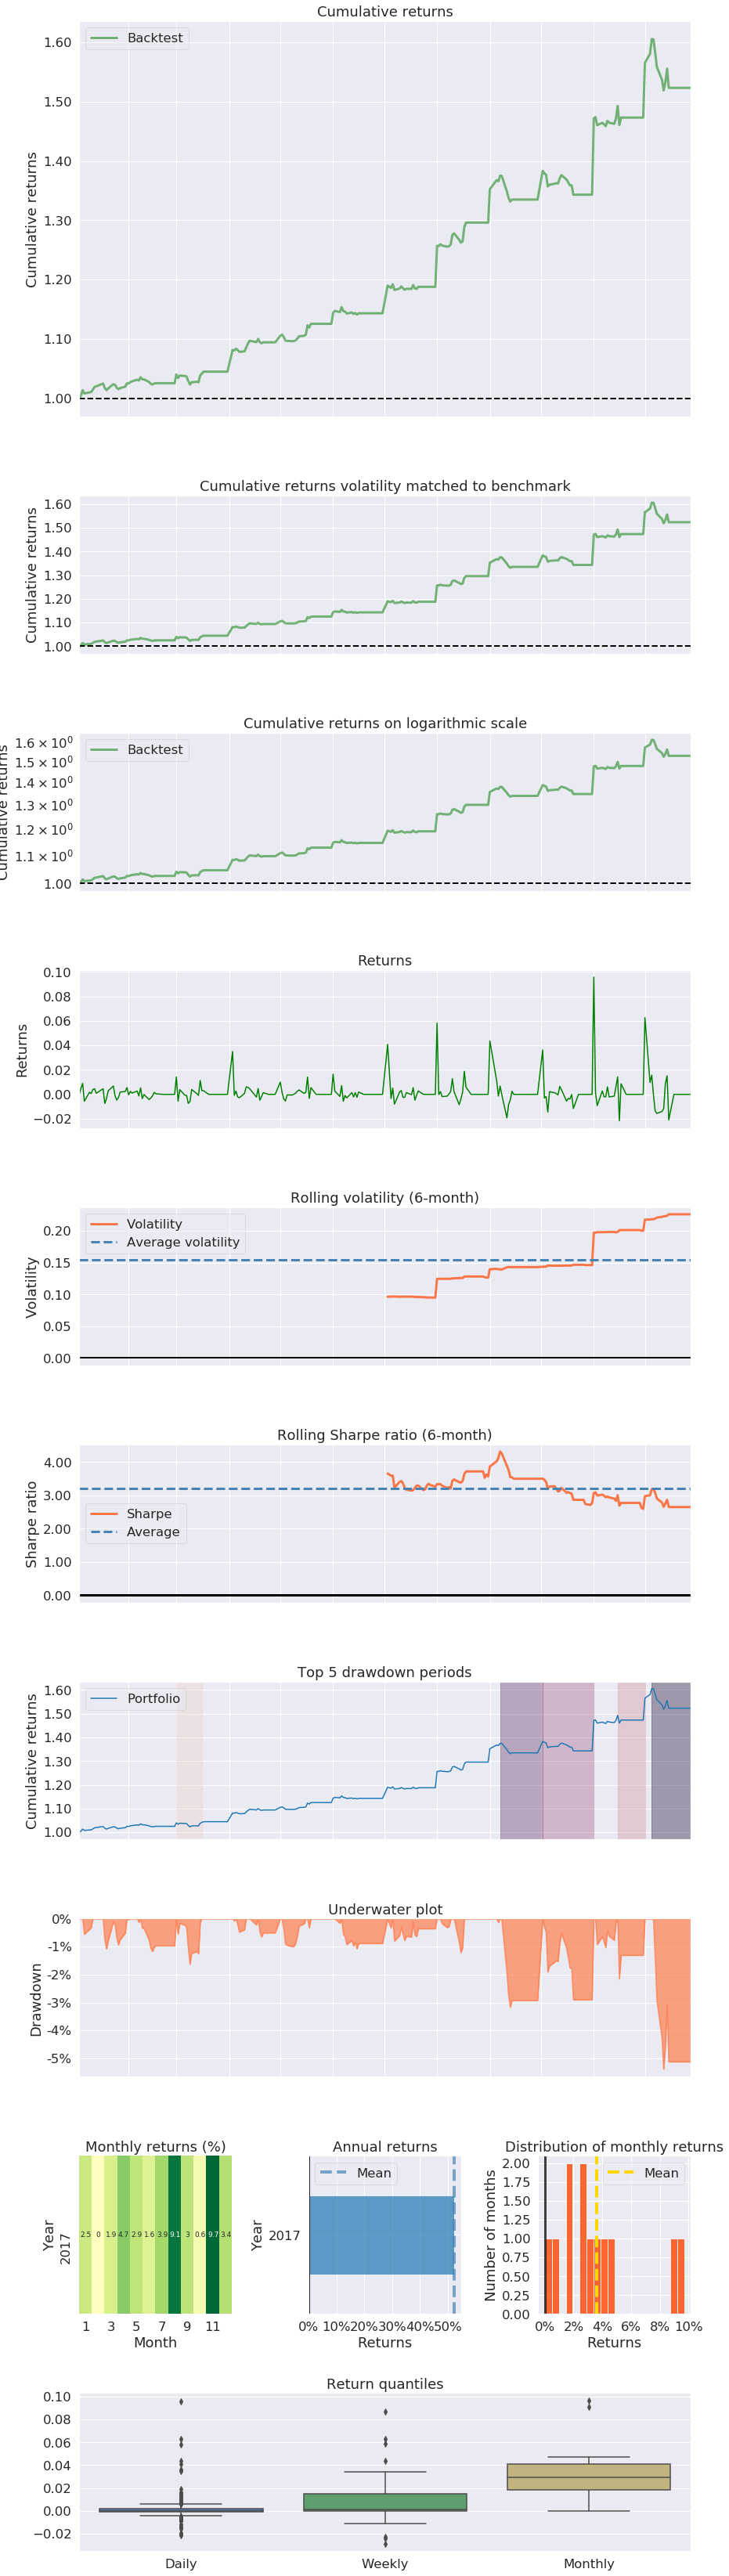

In [11]:
pf.create_returns_tear_sheet(returns =  bt.balance['% change'].dropna())